    1. ✔ Escolha de uma base de dados de um problema de aprendizado supervisionado; 
    2. Verificação dos relacionamentos entre as variáveis por meio das ferramentas gráficas;
    3. Escolha um modelo de aprendizado supervisionado para resolver o problema proposto pela base de dados escolhida;
    4. Realização de transformações nos dados da base;
    5. Avaliação do impacto das transformações previstas na etapa anterior no desempenho do modelo supervisionado.



In [153]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline 

In [148]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

    Análise das relações entre as variáveis

Utilizando o dataset TRAIN.CSV, analisaremos individualmente os valores de cada coluna para tentar perceber alguma correlação com a variável de saída
desejada (Se o paciente sobreviveu ou não.)

Análise de sobreviventes por sexo


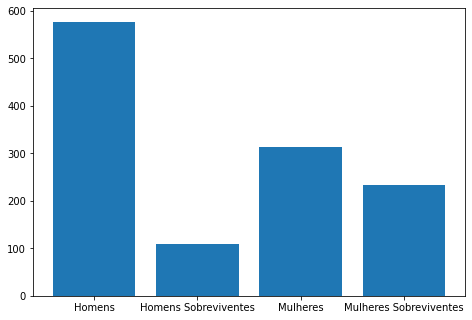

In [149]:
qtdPassenger = len(train.index)
qtdMale = len(train[train['Sex'] == 'male'])
qtdFemale = len(train[train['Sex'] == 'female'])

survived = train[train['Survived'] == 1]
maleSurvived = survived[survived['Sex'] == 'male']
femaleSurvived = survived[survived['Sex'] == 'female']

qtdSurvived = len(survived.index)
qtdMaleSurvived = len(maleSurvived.index)
qtdFemaleSurvived = len(femaleSurvived.index)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Homens', 'Homens Sobreviventes', 'Mulheres', 'Mulheres Sobreviventes']
values = [qtdMale, qtdMaleSurvived, qtdFemale, qtdFemaleSurvived]
ax.bar(labels,values)
plt.show()

Passageiros Por Classe

In [145]:
firstClass = train[train['Pclass'] == 1]
secondClass = train[train['Pclass'] == 2]
thirdClass = train[train['Pclass'] == 3]

firstClassSurvivors = firstClass[firstClass['Survived'] == 1]
secondClassSurvivors = secondClass[secondClass['Survived'] == 1]
thirdClassSurvivors = thirdClass[thirdClass['Survived'] == 1]

qtdFirstClass = len(firstClass.index)
qtdSecondClass = len(secondClass.index)
qtdThirdClass = len(thirdClass.index)

qtdFirstClassSurvived = len(firstClassSurvivors.index)
qtdSecondClassSurvived = len(secondClassSurvivors.index)
qtdThirdClassSurvived = len(thirdClassSurvivors.index)

pctgFirstClassSurvived = (qtdFirstClassSurvived/qtdFirstClass) * 100
pctgSecondClassSurvived = (qtdSecondClassSurvived/qtdSecondClass) * 100
pctgThirdClassSurvived = (qtdThirdClassSurvived/qtdThirdClass) * 100

print('Porcentagem sobrevivência 1ª classe: ' + "{:.2f}".format(pctgFirstClassSurvived) + '%')
print('Porcentagem sobrevivência 2ª classe: ' + "{:.2f}".format(pctgSecondClassSurvived) + '%')
print('Porcentagem sobrevivência 3ª classe: ' + "{:.2f}".format(pctgThirdClassSurvived) + '%')

Porcentagem sobrevivência 1ª classe: 62.96%
Porcentagem sobrevivência 2ª classe: 47.28%
Porcentagem sobrevivência 3ª classe: 24.24%


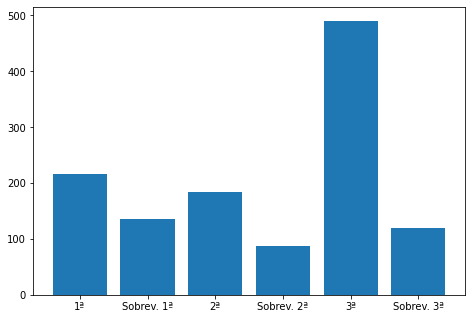

In [144]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['1ª', 'Sobrev. 1ª', '2ª', 'Sobrev. 2ª', '3ª', 'Sobrev. 3ª']
values = [qtdFirstClass, qtdFirstClassSurvived, qtdSecondClass, qtdSecondClassSurvived, qtdThirdClass, qtdThirdClassSurvived]
ax.bar(labels,values)
plt.show()


Sobreviventes por Classe

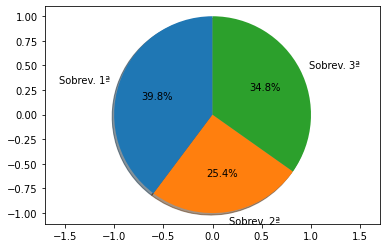

In [142]:
values = [qtdFirstClassSurvived, qtdSecondClassSurvived, qtdThirdClassSurvived]
labels=['Sobrev. 1ª', 'Sobrev. 2ª', 'Sobrev. 3ª']
explode = (0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, frame=True)
ax1.axis('equal')

plt.show()

Passageiros por idade

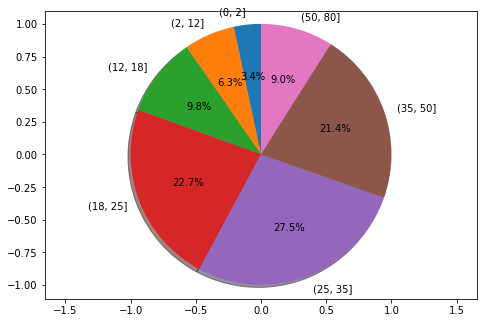

In [152]:
range = [0, 2, 12, 18, 25, 35, 50, 80]

idadeGeral = train['Age'].astype(float).groupby(pd.cut(train['Age'].astype(float), range)).count()


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
values = idadeGeral.to_numpy()
legenda=[
    '(0, 2]',
    '(2, 12]',
    '(12, 18]',
    '(18, 25]',
    '(25, 35]',
    '(35, 50]',
    '(50, 80]'
]
ax.pie(values, labels=legenda, shadow=True, autopct='%1.1f%%', startangle=90, frame = True)

plt.show()

Sobreviventes por idade

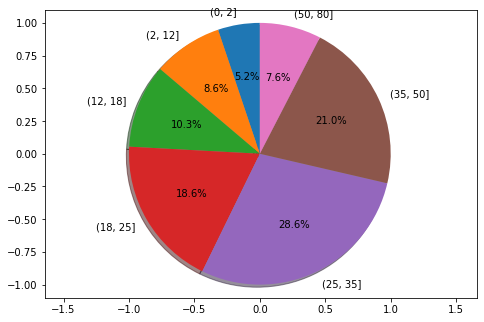

In [154]:
idadeSobreviventes = survived['Age'].astype(float).groupby(pd.cut(survived['Age'].astype(float), range)).count()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
values = idadeSobreviventes.to_numpy()
legenda=[
    '(0, 2]',
    '(2, 12]',
    '(12, 18]',
    '(18, 25]',
    '(25, 35]',
    '(35, 50]',
    '(50, 80]'
]
ax.pie(values, labels=legenda, shadow=True, autopct='%1.1f%%', startangle=90, frame = True)

plt.show()

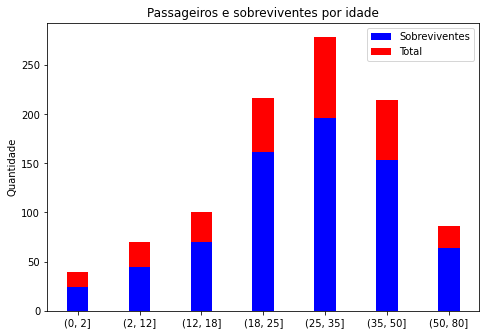

In [177]:
N = 7
ind = np.arange(N) # the x locations for the groups
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
legenda=[
    '(0, 2]',
    '(2, 12]',
    '(12, 18]',
    '(18, 25]',
    '(25, 35]',
    '(35, 50]',
    '(50, 80]'
]
ax.bar(ind, idadeGeral, width, color='b')
ax.bar(ind, idadeSobreviventes, width,bottom=idadeGeral, color='r')
ax.set_ylabel('Quantidade')
ax.set_title('Passageiros e sobreviventes por idade')
ax.set_xticks(ind, legenda)
ax.legend(labels=['Sobreviventes', 'Total'])
plt.show()

In [178]:
X_full.shape

(1309, 11)

Clean X_full. Afterwards, we will split it back up into training and test sets.

In [ ]:
X_full.drop('PassengerId', axis = 1, inplace=True)

In [ ]:
X_full.isnull().sum()

In [ ]:
(X_full.Age.isnull() & X_full.Cabin.isnull()).sum()

I would guess that these people died, so we couldn't collect their information. 

In [ ]:
train.Survived.mean()

In [ ]:
train.Cabin.notnull().mean()

Coincidence? Maybe not.

In [ ]:
(train.Cabin.isnull() & (train.Survived == 0)).mean()

In [ ]:
selector = (train.Cabin.isnull() & train.Age.isnull())

train[selector].Survived.mean()

In [ ]:
train.Survived.mean()

In [ ]:
selector = (train.Cabin.isnull())

train[selector].Survived.mean()

We can conclude that not cabin_null is a good indicator of not_survived, but cabin_null and age_null is even better.

In [ ]:
X_full['Nulls'] = X_full.Cabin.isnull().astype('int') + X_full.Age.isnull().astype('int')

We can further divide the cabin category by simply extracting the first letter.

In [ ]:
X_full['Cabin_mapped'] = X_full['Cabin'].astype(str).str[0] # this captures the letter

# this transforms the letters into numbers
cabin_dict = {k:i for i, k in enumerate(X_full.Cabin_mapped.unique())} 
X_full.loc[:, 'Cabin_mapped'] = X_full.loc[:, 'Cabin_mapped'].map(cabin_dict)

In [ ]:
cabin_dict

In [ ]:
X_full.columns

In [ ]:
X_full.drop(['Age', 'Cabin'], inplace = True, axis = 1)

The guy with the missing fare was from thee lower class. Assume he paid the average price.

In [ ]:
fare_mean = X_full[X_full.Pclass == 3].Fare.mean()

X_full['Fare'].fillna(fare_mean, inplace = True)

In [ ]:
X_full.isnull().sum()

In [ ]:
X_full[X_full.Embarked.isnull()]

In [ ]:
X_full[X_full['Pclass'] == 1].Embarked.value_counts()

In [ ]:
X_full['Embarked'].fillna('S', inplace = True)

In [ ]:
X_full.isnull().sum()

In [ ]:
X_full.drop(['Name', 'Ticket'], axis = 1, inplace = True)

In [ ]:
X_full.dtypes.

In [ ]:
X_dummies = pd.get_dummies(X_full, columns = ['Sex', 'Nulls', 'Cabin_mapped', 'Embarked'], drop_first= True)

In [ ]:
X_dummies.dtypes

Now let's train.

In [ ]:
X = X_dummies[:len(train)]; new_X = X_dummies[len(train):]
y = train.Survived

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = .3,
                                                    random_state = 5,
                                                   stratify = y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

rf.score(X_test, y_test)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb.fit(X_train, y_train)

In [ ]:
xgb.score(X_test, y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, y_train)
lg.score(X_test, y_test)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid: gbm_param_grid 
gbm_param_grid = {
    'n_estimators': range(8, 20),
    'max_depth': range(6, 10),
    'learning_rate': [.4, .45, .5, .55, .6],
    'colsample_bytree': [.6, .7, .8, .9, 1]
}

# Instantiate the regressor: gbm
gbm = XGBClassifier(n_estimators=10)

# Perform random search: grid_mse
xgb_random = RandomizedSearchCV(param_distributions=gbm_param_grid, 
                                    estimator = gbm, scoring = "accuracy", 
                                    verbose = 1, n_iter = 50, cv = 4)


# Fit randomized_mse to the data
xgb_random.fit(X, y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", xgb_random.best_params_)
print("Best accuracy found: ", xgb_random.best_score_)

In [ ]:
xgb_pred = xgb_random.predict(new_X)"{:.2f}".format("{:.2f}".format("{:.2f}".format(((( + print('Porcentagem sobrevivência 1ª classe: ' + "{:.2f}".format(pctgFirstClassSurvived) + '%') + '%') + '%')qtdFirstClassSurvived = len(firstClassSurvivors.index)
qtdSecondClassSurvived = len(secondClassSurvivors.index)
qtdThirdClassSurvived = len(thirdClassSurvivors.index)

pctgFirstClassSurvived = (qtdFirstClassSurvived/qtdFirstClass) * 100
pctgSecondClassSurvived = (qtdSecondClassSurvived/qtdSecondClass) * 100
pctgThirdClassSurvived = (qtdThirdClassSurvived/qtdThirdClass) * 100

print('Porcentagem sobrevivência 1ª classe: ' + "{:.2f}".format(pctgFirstClassSurvived) + '%')
print('Porcentagem sobrevivência 2ª classe: ' + "{:.2f}".format(pctgSecondClassSurvived) + '%')
print('Porcentagem sobrevivência 3ª classe: ' + "{:.2f}".format(pctgThirdClassSurvived) + '%')

In [ ]:
submission = pd.concat([test.PassengerId, pd.DataFrame(xgb_pred)], axis = 'columns')

In [ ]:
submission.columns = ["PassengerId", "Survived"]

In [ ]:
submission.to_csv('titanic_submission.csv', header = True, index = False)